# Air quality in Bristol

## Question: Did air quality in Bristol improve as a result of the Clean Air Zone scheme?

Data taken from https://open-data-bristol-bcc.hub.arcgis.com/documents/dc454f5fb8bf41eeb4112514d4f00242/about

This Python demonstration will look at a few gases related to air quality which are measured in and around Bristol, United Kingdom. The map below shows some of the locations of instruments which have been continuously measuring gases such as nitrogen monoxide, $NO$, and nitrogen dioxide, $NO_2$, in the air (these and other gases are collectively called $NO_x$). 

---

## The Clean Air Zone

On the 28th November 2022, the Clean Air Zone was put in place in Bristol. The aims of the Zone are to:
- Improve air quality by reducing harmful levels of air pollution caused by traffic
- Make sure everyone benefits from a healthy and natural environment

(see https://www.bristol.gov.uk/residents/streets-travel/bristols-caz/view-a-map and https://www.cleanairforbristol.org/ for more details)

There are several datasets that will be used in this demo, corresponding to different locations in Bristol. They are:
- `temple_way.csv` (Temple Way)
- `brislington.csv` (Brislington Depot)
- `parson.csv` (Parson Street School)
- `wells_road.csv` (Wells Road)

The aim of this demo is to examine the data before and after this scheme was put in place, and see if having the Clean Air Zone scheme in place has had an impact on the areas in the city centre (such as Temple Way), as well as those further away from the city centre (Brislington Depot, Parson Street School and Wells Road) too.
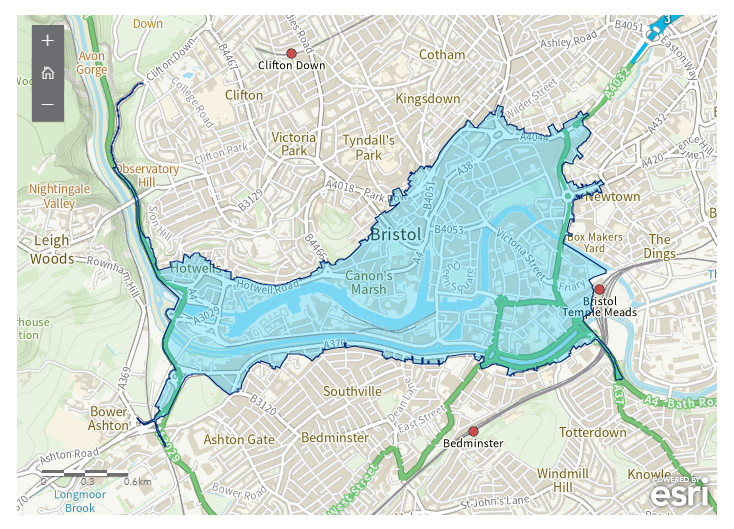

---

# How to use Jupyter

In Jupyter notebooks code can be run cell by cell. Cells are like textboxes which let you input code and comments, and the play button (⏵) lets you run cells individually. The fast forward button (⏩) lets you run the entire notebook. You can also press Shift+Enter to run cells individually.

Some of the cells can be run as they are and others will require you to input some code before running. It will be specified which you need to do.

Run this code and have a look at the map. You should be able to see the Clean Air Zone (a shaded area around the city centre), as well as the 4 locations indicated by markers. You can zoom in and out, and hover your mouse above the markers to see which location it is.

The code to build this map makes use of the [`folium` library in Python](https://python-visualization.github.io/folium/latest/), and most of the code used for this is in the `map.py` _module_ file. The file used to mark the Clean Air Zone is the [GeoJSON file that is available from the West of England Open Portal](https://opendata.westofengland-ca.gov.uk/explore/dataset/weca_caz/export/). You don't need to worry about the code for now (although if you're interested, you can take a look), but do run the cell and have a look at the results.

In [ ]:
from map import create_map, add_marker
m = create_map()
add_marker(m, 51.457950, -2.583989, "Temple Way")
add_marker(m, 51.441747, -2.559956, "Brislington Depot")
add_marker(m, 51.432676, -2.604957, "Parson Street School")
add_marker(m, 51.427864, -2.563742, "Wells Road")

---

## Reading the data

First, we will import the _libraries_ that we require - these are pre-written packages that have various different functionalities. Most of them are imported in the format `import X as Y`, where `X` is the full name of the library and `Y` is an abbreviation for it - you can put anything you want as the name for `Y`, but there is normally a naming convention for each library, such as `pandas` being shortened to `pd`, to create consistency across code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

The library we will be using to read in this data is called `pandas` which derives its name from the term _panel data_, used in econometrics to refer to multi-dimensional structured data, often involving measurements over time. There is a specific function to do read data in a .csv format, `read_csv()`. Let's read in the data for the Temple Way dataset first.

In [ ]:
data_temple_way_filename = "data/temple_way.csv"
data_temple_way = pd.read_csv(data_temple_way_filename, parse_dates=True)
data_temple_way.head()
data_temple_way.set_index("DATE_TIME", inplace=True) # sets index to DATE_TIME, to make it easier to access values later on
data_temple_way.index = pd.to_datetime(data_temple_way.index)

In [ ]:
data_temple_way

We have created a variable called `data` which contains a table of information that we have extracted from a file.

This contains the date and time that each measurement was taken at the Temple Way site, along with the measurement values for nitrogen monoxide, $NO$, nitrogen dioxide, $NO_2$ and the combination as $NO_x$. All measurements are in units of $\mu g m^{-3}$ (micrograms per meter cubed).

In [ ]:
data_temple_way.head()

---

### Selecting dates

If we look at the table above we can see this starts in 2017 and ends in 2023. If we want to extract data for just one year we can write:

In [ ]:
data_temple_way.loc["2017"]

**Question (1): How do you think you could extract the data for 2018?**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [ ]:
## ADD TEXT HERE


---

### Statistical properties

We're going to save out the results both 2018 and 2023 to two separate names for easier access:

In [ ]:
data_temple_way_2018 = data_temple_way.loc["2018"]
data_temple_way_2023 = data_temple_way.loc["2023"]

If we look at `data_temple_way_2018` we can see that this contains all of our data related to 2018:

In [ ]:
data_temple_way_2018

We can look at the average (mean) for all the columns by writing:

In [ ]:
data_temple_way_2018.mean()

**Question (2): How could we find the average (mean) for the 2023 data?**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [ ]:
## ADD TEXT HERE


**Question (3): Is the average higher or lower in 2023 compared to 2018 for the three gas measurements?**

*Discuss in groups*

---

### Creating plots

We can also plot all of the measurements within `data_temple_way` using:

In [ ]:
data_temple_way.plot()
plt.xlabel("date")
plt.ylabel("concentration of NO$_X$ / µg m$^{-3}$")
plt.axvline(x="2022-11-28", linestyle='--', label = "Clean Air Zone implemented") # Adds dashed line for when Clean Air Zone was implemented
plt.legend()

**Question (4): There's lots of spikes but what does the overall trend look like? What year do we see the highest peaks?**

*Discuss in groups*

We could smooth over the data by applying a rolling average over a time period. This means that we look at the average of all the values around each time point within a given time window.

In this case we can find the rolling average for `data_temple_way` using a window of 365 days ("365D") i.e. a year and save this to a new name called `data_temple_way_rolling_average`.

In [ ]:
data_temple_way.sort_index(inplace = True)
data_temple_way_rolling_average = data_temple_way.rolling("365D", min_periods = 7).mean()
data_temple_way_rolling_average[data_temple_way_rolling_average.index > "2017-04-01"].plot()
plt.xlabel("date")
plt.ylabel("concentration of NO$_x$ / µg m$^{-3}$")
plt.title("NO$_X$ measurements in Temple Way")
plt.axvline(x="2022-11-28", linestyle='--', label = "Clean Air Zone implemented")
plt.legend()

We can see that there is a slight decrease between 2023 and 2024 (particularly for the NOX levels), so it is possible that the air quality improved as a result of this scheme.

---

### Expanding our analysis

Now that we have an idea of the air quality around Temple Way, we will have a look at the data for other locations in Bristol - by the end of this, we will plot a graph that contains data from all 4 locations and look at the general trends.

In [ ]:
data_brislington_filename = "data/brislington.csv"
data_brislington = pd.read_csv(data_brislington_filename, parse_dates=True)
data_brislington.set_index("DATE_TIME",inplace=True)
data_brislington.index = pd.to_datetime(data_brislington.index)

**Question (5): How could we plot this data?**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [ ]:
## ADD TEXT HERE


We'll now plot this (as you've done above) but with the rolling average feature.

Run this code to look at the general trend - note that although the data starts from 2001, it has been filtered out to only show the data from early 2017 onwards, to match timescales with Temple Way and give a better comparison.

In [ ]:
data_brislington.sort_index(inplace = True)
data_brislington_rolling_average = data_brislington.rolling("365D", min_periods = 7).mean()
data_brislington_rolling_average[data_brislington_rolling_average.index > "2017-04-01"].plot()
plt.xlabel("date")
plt.ylabel("concentration of NO$_X$ / µg m$^{-3}$")
plt.title("NO$_X$ measurements in Brislington Depot")
plt.axvline(x="2022-11-28", linestyle='--', label = "Clean Air Zone implemented")
plt.legend()

The trend seems similar to that of Temple Way but because this data spans a longer timescale and the rolling averages have been taken continuously before the start point on the graph, there isn't much of a peak.

Now we will do the same for Parson Street School:

In [ ]:
data_parson_filename = "data/parson.csv"
data_parson = pd.read_csv(data_parson_filename, parse_dates=True)
data_parson.set_index("DATE_TIME",inplace=True)
data_parson.index = pd.to_datetime(data_parson.index)

In [ ]:
data_parson.sort_index(inplace = True)
data_parson_rolling_average = data_parson.rolling("365D", min_periods = 7).mean()
data_parson_rolling_average[data_parson_rolling_average.index > "2017-04-01"].plot()
plt.xlabel("date")
plt.ylabel("concentration of NO$_X$ / µg m$^{-3}$")
plt.title("NO$_X$ measurements in Parson Street School")
plt.axvline(x="2022-11-28", linestyle='--', label = "Clean Air Zone implemented")
plt.legend()

And finally, for Wells Road.

In [ ]:
data_wells_road_filename = "data/wells_road.csv"
data_wells_road = pd.read_csv(data_wells_road_filename, parse_dates=True)
data_wells_road.set_index("DATE_TIME",inplace=True)
data_wells_road.index = pd.to_datetime(data_wells_road.index)

In [ ]:
data_wells_road.sort_index(inplace = True)
data_wells_road_rolling_average = data_wells_road.rolling("365D", min_periods = 7).mean()
data_wells_road_rolling_average[data_wells_road_rolling_average.index > "2017-04-01"].plot()
plt.xlabel("date")
plt.ylabel("concentration of NO$_X$ / µg m$^{-3}$")
plt.title("NO$_X$ measurements in Wells Road")
plt.axvline(x="2022-11-28", linestyle='--', label = "Clean Air Zone implemented")
plt.legend()

**Question (6): How do the data for these 4 locations compare?**

*Discuss in groups*

---

### Bringing it together

Now that we have plotted the graphs of these locations individually, we can also combine these measurements for all the locations and plot them on a single graph for an easier comparison. To do this, we can first create variables for each column of the dataset, for each location - we will only use the $NO_X$ measurements in this case to avoid having too many lines on the graph.

In [ ]:
data_temple_way_nox = data_temple_way[["NOX"]]
data_brislington_nox = data_brislington[["NOX"]]
data_parson_nox = data_parson[["NOX"]]
data_wells_road_nox = data_wells_road[["NOX"]]

The `data_temple_way_nox` variable now looks something like this:

![image.png](screenshot_nox.png)

However, without any other information we can't tell which location this data is from. We can rename the column, to replace "`NOX`" with "`Temple Way`", and repeat for the other locations. We can then _merge_ these columns together to form a new dataset which we can plot a graph for.
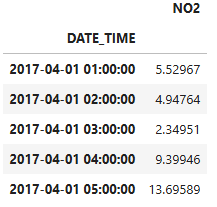
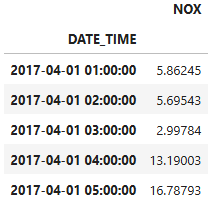

In [ ]:
data_temple_way_nox = data_temple_way_nox.rename(columns = {"NOX":"Temple Way"})
data_brislington_nox = data_brislington_nox.rename(columns = {"NOX":"Brislington"})
data_parson_nox = data_parson_nox.rename(columns = {"NOX":"Parson Street School"})
data_wells_road_nox = data_wells_road_nox.rename(columns = {"NOX":"Wells Road"})

In [ ]:
data_locations_nox = pd.merge(data_temple_way_nox, data_brislington_nox, on = "DATE_TIME")
data_locations_nox = pd.merge(data_locations_nox, data_parson_nox, on = "DATE_TIME")
data_locations_nox = pd.merge(data_locations_nox, data_wells_road_nox, on = "DATE_TIME")

We have formed the new dataset, `data_locations_nox`. This contains all the NOX values for each of the locations at given dates. Note that since the locations contained data for different years, the dataset only includes the dates that are in common for all the locations i.e. from `2017-04-01 01:00:00` to `2023-12-31 23:00:00`.

In [ ]:
data_locations_nox

In [ ]:
data_locations_nox_rolling_average = data_locations_nox.rolling("365D", min_periods = 7).mean()
data_locations_nox_rolling_average.plot()
plt.xlabel("date")
plt.ylabel("concentration of NO$_X$ / µg m$^{-3}$")
plt.axvline(x="2022-11-28", linestyle='--', label = "Clean Air Zone implemented")
plt.legend()

Again, difficult to tell, but it seems that Temple Way, being closest to the city centre, has had the biggest decrease in NO$_X$ levels. It is not so clear for the other locations since they are not inside the Zone, however we can also zoom into this period further by filtering our dataset.

In [ ]:
data_locations_nox_late = data_locations_nox[data_locations_nox.index > "2022-01-01"]
data_locations_nox_late.sort_index(inplace = True)
data_locations_nox_late_rolling_average = data_locations_nox_late.rolling("365D", min_periods = 14).mean()
data_locations_nox_late_rolling_average.plot()
plt.xlabel("date")
plt.ylabel("concentration of NO$_X$ / µg m$^{-3}$")
plt.axvline(x="2022-11-28", linestyle='--', label = "Clean Air Zone implemented")
plt.legend()

**Question (7): Do you think there is enough data to suggest that the Clean Air Zone has had a noticeable effect on the NO$_X$ values in these locations?**

*Discuss in groups*